In [1]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import seaborn as sns
import os

2024-01-08 17:37:37.783152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Chose the paths

In [6]:
## Load the data


dropbox_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/'
data_dir = f'{dropbox_dir}/development_CohortCombination/data_2023_november'
input_dir= os.path.join(data_dir,'synth_norm','selected_studies 12','thresh50')
keras_dir = os.path.join(input_dir,'combat_survival_class_task','keras_autoencoder_models0')


latent_size =64
pre_trained_model_loc = f'{keras_dir}/pretrained_0_{latent_size}_sigmoid_L1_15.keras'

input_data_path = f'{input_dir}/peak_intensity_combat.csv'
metadata_path = f'{data_dir}/metadata_oct13_new2.csv'

## Load the data

In [7]:
# Step 0: load the metadata
metadata = pd.read_csv(metadata_path, index_col=0)

# Step 1: Load the pre-trained Keras encoder model.
encoder_model = load_model(pre_trained_model_loc)

# Step 2: Load the data from the CSV file.
data = pd.read_csv(input_data_path, index_col=0).T
file_names = data.index.values

In [15]:
# Step 3: Transform the data using the encoder model.
transformed_data = encoder_model.predict(data)


391/391 [==============================] - 0s 857us/step


In [16]:
# Step 4: Use UMAP to reduce the dimensionality of the transformed data.
umap_embeddings = umap.UMAP(n_neighbors=50).fit_transform(transformed_data)

In [9]:
def create_umap_plot(umap_df,hue_label,palette,fig_path=None,hue_order=None):
    sz = 3
    sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue=hue_label, palette=palette, s=sz,hue_order=hue_order)
    # place legend outside of plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8, title=hue_label)
    if fig_path is None:
        plt.show()
    else:
        plt.title(f'Autoencoder ({latent_size}) Embeddings on Combat-corrected peaks ({data.shape[0]})')
        plt.savefig(fig_path+'_'+hue_label+'.png', bbox_inches='tight', dpi=600)
        plt.close()

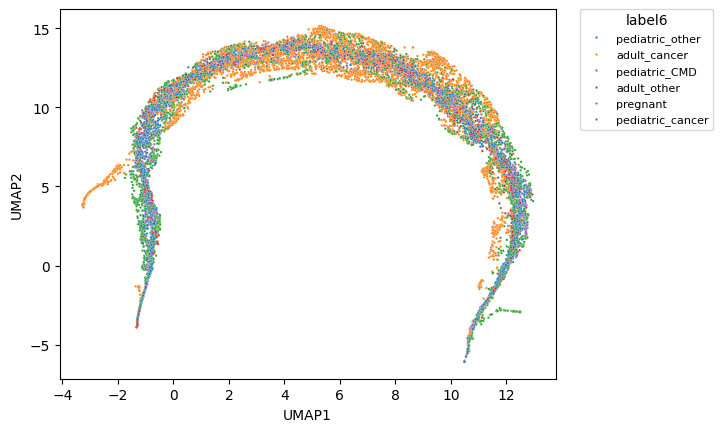

In [17]:
# Step 5 (optional): Plot the results.
umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
umap_df['Study'] = metadata.loc[file_names,'Study'].values
umap_df['label6'] = metadata.loc[file_names,'label6'].values
hue_order2 = ['pediatric_other','adult_cancer','pediatric_CMD','adult_other','pregnant','pediatric_cancer']

# fig_path = f'{dropbox_dir}/development_CohortCombination/figures/umap'
create_umap_plot(umap_df,hue_label='label6',palette='tab10',fig_path=None,hue_order = hue_order2)